In [0]:
# 1.)  reading data and formatting

def read_file(file_name): 
    data_list  = []
    with open(file_name, 'r') as f: 
        for line in f: 
            line = line.strip() 
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data_list.append([label, text])
    return data_list 

In [0]:
file_name = "../content/psychExp.txt"
psychExp_txt = read_file(file_name)

In [35]:
psychExp_txt[2][1]

'When I was driving home after  several days of hard work, there was a motorist ahead of me who was driving at 50 km/hour and refused, despite his low speeed to let me overtake.'

In [36]:
print('Total no. of instances: {}'.format(len(psychExp_txt)))

Total no. of instances: 7480


In [0]:
def convert_label(item, name): 
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)): 
        if items[idx] == 1: 
            label += name[idx] + " "
    
    return label.strip()

In [0]:
emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]

In [0]:
X_all = []
y_all = []
for label, text in psychExp_txt:
    X_all.append(text.lower())
    y_all.append(convert_label(label, emotions))

In [40]:
print(X_all[0],'-->',y_all[0])


during the period of falling in love, each time that we met and especially when we had not met for a long time. --> joy


In [41]:
# Data processing

from string import punctuation
print('punctuations to be removed: {}'.format(punctuation))

X_all_pro = []
for text in X_all:
    all_text = ''.join([c for c in text if c not in punctuation])
    X_all_pro.append(all_text)

punctuations to be removed: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [0]:
# Tokenize — Create Vocab to Int mapping dictionary

from collections import Counter
all_text2 = ' '.join(X_all_pro)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [43]:
print (count_words)

Counter({'i': 10782, 'the': 6105, 'a': 6076, 'to': 4752, 'my': 4724, 'and': 4617, 'was': 4556, 'when': 3681, 'of': 3015, 'in': 2794, 'had': 2592, 'me': 2306, 'that': 2156, 'for': 1617, 'not': 1591, 'with': 1558, 'it': 1510, 'at': 1455, 'on': 1048, 'he': 987, 'very': 984, 'felt': 897, 'friend': 880, 'an': 778, 'she': 746, 'her': 727, 'we': 699, 'one': 697, 'as': 672, 'about': 655, 'this': 615, 'from': 611, 'after': 607, 'by': 595, 'time': 592, 'were': 578, 'did': 567, 'but': 539, 'out': 537, 'him': 531, 'who': 517, 'because': 491, 'his': 459, 'friends': 459, 'been': 441, 'got': 439, 'have': 431, 'which': 422, 'some': 419, 'home': 408, 'told': 391, 'would': 391, 'so': 385, 'up': 381, 'mother': 381, 'day': 372, 'they': 369, 'do': 364, 'be': 358, 'school': 352, 'people': 350, 'went': 344, 'there': 338, 'saw': 335, 'person': 323, 'is': 317, 'first': 310, 'could': 307, 'our': 307, 'came': 301, 'father': 298, 'night': 294, 'all': 291, 'made': 287, 'mine': 286, 'go': 284, 'didnt': 277, 'having

In [0]:
# vocab to integer mapping dictionary with starting index 1

vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [45]:
print (vocab_to_int)

{'i': 1, 'the': 2, 'a': 3, 'to': 4, 'my': 5, 'and': 6, 'was': 7, 'when': 8, 'of': 9, 'in': 10, 'had': 11, 'me': 12, 'that': 13, 'for': 14, 'not': 15, 'with': 16, 'it': 17, 'at': 18, 'on': 19, 'he': 20, 'very': 21, 'felt': 22, 'friend': 23, 'an': 24, 'she': 25, 'her': 26, 'we': 27, 'one': 28, 'as': 29, 'about': 30, 'this': 31, 'from': 32, 'after': 33, 'by': 34, 'time': 35, 'were': 36, 'did': 37, 'but': 38, 'out': 39, 'him': 40, 'who': 41, 'because': 42, 'his': 43, 'friends': 44, 'been': 45, 'got': 46, 'have': 47, 'which': 48, 'some': 49, 'home': 50, 'told': 51, 'would': 52, 'so': 53, 'up': 54, 'mother': 55, 'day': 56, 'they': 57, 'do': 58, 'be': 59, 'school': 60, 'people': 61, 'went': 62, 'there': 63, 'saw': 64, 'person': 65, 'is': 66, 'first': 67, 'could': 68, 'our': 69, 'came': 70, 'father': 71, 'night': 72, 'all': 73, 'made': 74, 'mine': 75, 'go': 76, 'didnt': 77, 'having': 78, 'back': 79, 'something': 80, 'being': 81, 'other': 82, 'car': 83, 'boyfriend': 84, 'them': 85, 'found': 86,

In [46]:
# encoading the words

X_all_int = []
for text in X_all_pro:
    r = [vocab_to_int[w] for w in text.split()]
    X_all_int.append(r)
    
print (X_all_int[0:3])

[[112, 2, 572, 9, 952, 10, 161, 256, 35, 13, 27, 169, 6, 540, 8, 27, 11, 15, 169, 14, 3, 150, 35], [8, 1, 7, 414, 10, 3, 772, 192], [8, 1, 7, 326, 50, 33, 189, 177, 9, 347, 114, 63, 7, 3, 4683, 1363, 9, 12, 41, 7, 326, 18, 1462, 4684, 6, 283, 550, 43, 606, 4685, 4, 314, 12, 2282]]


In [47]:
# example for label encoding

test_label_text = y_all[0:9]
print(test_label_text)

def label_to_int(label_text):
    emotions_dict = {"joy":0, "fear":1, "anger":2, "sadness":3, "disgust":4, "shame":5, "guilt":6}
    label_int = []
    for label in label_text:
        label_int.append(emotions_dict[label])
    return label_int

test_label = label_to_int(test_label_text)
print(test_label)

import numpy as np

def indices_to_one_hot(data, nb_classes):
    """Convert an iterable of indices to one-hot encoded labels."""
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]

nb_classes = 7
data = test_label
#indices_to_one_hot(data, nb_classes)

['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'joy', 'fear']
[0, 1, 2, 3, 4, 5, 6, 0, 1]


In [48]:
# encoading the labels
labels = label_to_int(y_all)
print(labels[0:9])
# y_all one hot encoaded label
#y_all_ohe = indices_to_one_hot(labels, 7)

#print(y_all_ohe[0:9])

[0, 1, 2, 3, 4, 5, 6, 0, 1]


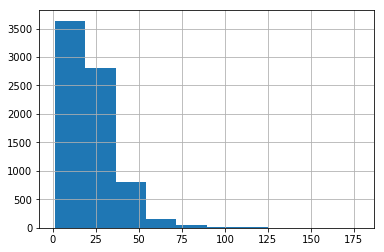

count    7480.000000
mean       22.160160
std        14.654072
min         1.000000
25%        12.000000
50%        19.000000
75%        30.000000
max       178.000000
dtype: float64

In [49]:
# analysing the text data lenghth
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
text_len = [len(x) for x in X_all_int]
pd.Series(text_len).hist()
plt.show()
pd.Series(text_len).describe()

In [0]:
# mean text length is 22 words
# Removing Outliers — Getting rid of extremely long or short reviews

#X_all_int = [ X_all_int[i] for i, l in enumerate(text_len) if l>0 ]
#y_all_ohe = [ y_all_ohe[i] for i, l in enumerate(text_len) if l> 0 ]

In [0]:
# padding the data for having same dimention

def pad_features(text_int, seq_length):
    ''' Return features of text_ints, where each text is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(text_int), seq_length), dtype = int)
    
    for i, text in enumerate(text_int):
        text_len = len(text)
        
        if text_len <= seq_length:
            zeroes = list(np.zeros(seq_length-text_len))
            new = zeroes+text
        elif text_len > seq_length:
            new = text[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features



In [51]:
seq_length = 50
X_all_pad = pad_features(X_all_int, seq_length)
X_all_pad[0:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 112,   2, 572,   9, 952,  10, 161, 256,  35,  13,  27, 169,
          6, 540,   8,  27,  11,  15, 169,  14,   3, 150,  35],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   8,   1,   7, 414,  10,   3, 772, 192]])

In [53]:
print('length of X_all_pad: {}'.format(len(X_all_pad)))
print('length of labels: {}'.format(len(labels)))

# converting labels from list to numpy.nparray
print('data type of labels before convesion: {}'.format(type(labels)))
labels = np.array(labels)
print('data type of labels after convesion: {}'.format(type(labels)))

length of X_all_pad: 7480
length of labels: 7480
data type of labels before convesion: <class 'list'>
data type of labels after convesion: <class 'numpy.ndarray'>


In [54]:
# train (80%), validation (10%) ,test data (10%) split

len_X_all = len(X_all_pad)


split_frac = 0.8

train_x = X_all_pad[0:int(split_frac*len_X_all)+16]
train_y = labels[0:int(split_frac*len_X_all)+16]

remaining_x = X_all_pad[int(split_frac*len_X_all)-4:]
remaining_y = labels[int(split_frac*len_X_all)-4:]

valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]

test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

print(type(train_x),type(np.array(train_y)))

print("train data size: ",train_x.shape)
print("remaining data size: ",remaining_x.shape)
print("valid data size: ",valid_x.shape)
print("test data size: ",test_x.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
train data size:  (6000, 50)
remaining data size:  (1500, 50)
valid data size:  (750, 50)
test data size:  (750, 50)


In [0]:
# Data loading and batch formation

import torch
from torch.utils.data import DataLoader, TensorDataset

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 50

# Shuffeling the data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [56]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 50])
Sample input: 
 tensor([[   0,    0,    0,  ...,   14,   31,  231],
        [   0,    0,    0,  ...,   20,   52,  343],
        [   0,    0,    0,  ...,  150, 2357,  572],
        ...,
        [   0,    0,    0,  ...,  231,   14,   31],
        [   0,    0,    0,  ...,  139,   10,   35],
        [   0,    0,    0,  ...,   10,    3,   83]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([5, 1, 0, 2, 3, 1, 1, 3, 6, 0, 5, 3, 3, 1, 1, 4, 0, 5, 4, 2, 1, 1, 0, 6,
        5, 4, 3, 5, 3, 6, 0, 3, 3, 2, 3, 1, 2, 0, 5, 0, 3, 3, 4, 5, 2, 1, 3, 5,
        1, 1])


In [0]:
# building the model

import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        #self.sig = nn.Softmax(dim=1)
        self.relu = nn.ReLU()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)
        seq_len = x.size(1)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        #lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        lstm_out = lstm_out[:, -1, :]
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # softmax function
        #sig_out = self.sig(out)
        
        # reshape to be batch_size first
        #sig_out = sig_out.view(batch_size, -1)
        #sig_out = sig_out[:, -1] # get last batch of labels
        
        #out = out[seq_len*batch_size-batch_size:]
        
        relu_out = self.relu(out)
        
        # return last sigmoid output and hidden state
        return relu_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden
        

In [83]:
# training the model
# Instantiate the model weights and hyperparams

vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 7
embedding_dim = 400
hidden_dim = 256
n_layers = 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)


cuda:0
SentimentLSTM(
  (embedding): Embedding(9340, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3)
  (fc): Linear(in_features=256, out_features=7, bias=True)
  (relu): ReLU()
)


In [84]:
lr=0.001 # learning rate

#criterion = nn.BCELoss()

import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=lr)

def cross_entropy_loss_OHE(x_pred,x_target):
    logged_x_pred = torch.log(x_pred)
    cost_value = -torch.sum(x_target * logged_x_pred)
    return cost_value

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# training params

epochs = 10

counter = 0
print_every = 100
clip=5 # gradient clipping

train_on_gpu = torch.device(1 if torch.cuda.is_available() else 0)
# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(50)
    
    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.to(device), labels.to(device)

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()
        #print(inputs.size())
        #print(inputs)
        # get the output from the model
        
        inputs = inputs.type(torch.LongTensor)
        #print("input size : ",inputs.size())
        output, h = net(inputs.to(device),h)
        
        #labels = torch.tensor(labels, dtype=torch.long, device=device)
        #labels = labels.float()
        
        ##_, labels = labels.max(dim=0)
        #_, labels = labels.max(1)
        
        #print(output)
        #print("output size: ",output.size())
        #print(counter)
        # calculate the loss and perform backprop
        loss = criterion(output, labels)
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
          
            # Get validation loss
            val_h = net.init_hidden(50)
            
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.to(device), labels.to(device)

                inputs = inputs.type(torch.LongTensor)
                #print("input size for valid : ",inputs.size())
                output, val_h = net(inputs.to(device),val_h)
                #print("output size for valid : ",output.size())
                #labels = labels.float()
                #_, labels = labels.max(1)
                val_loss = criterion(output, labels)

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/10... Step: 100... Loss: 1.495458... Val Loss: 1.706126
Epoch: 2/10... Step: 200... Loss: 1.198288... Val Loss: 1.440140
Epoch: 3/10... Step: 300... Loss: 1.154514... Val Loss: 1.288493
Epoch: 4/10... Step: 400... Loss: 0.753603... Val Loss: 1.287190
Epoch: 5/10... Step: 500... Loss: 0.425258... Val Loss: 1.273821
Epoch: 5/10... Step: 600... Loss: 0.725587... Val Loss: 1.323391
Epoch: 6/10... Step: 700... Loss: 0.232625... Val Loss: 1.419959
Epoch: 7/10... Step: 800... Loss: 0.269859... Val Loss: 1.590577
Epoch: 8/10... Step: 900... Loss: 0.088376... Val Loss: 1.618019
Epoch: 9/10... Step: 1000... Loss: 0.166224... Val Loss: 1.800811
Epoch: 10/10... Step: 1100... Loss: 0.155596... Val Loss: 1.765153
Epoch: 10/10... Step: 1200... Loss: 0.003610... Val Loss: 1.863016


In [87]:
test_losses = [] # for tracking loss
num_correct = 0
train_on_gpu = torch.device(1 if torch.cuda.is_available() else 0)
# init hidden state
h = net.init_hidden(batch_size)
total = 0
correct = 0
net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.to(device), labels.to(device)
    #print(labels)
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs.to(device), h)
    
    _, predicted = torch.max(output.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    
    test_loss = criterion(output, labels)
    test_losses.append(test_loss.item())
    
    #_, output = output.max(1)
    #pred = indices_to_one_hot(output.cpu(),7)
    
    # convert output probabilities to predicted classes 
    #pred = output.squeeze()  # rounds to the nearest integer
    
    # compare predictions to true label
    #correct_tensor = pred.eq(labels.float().view_as(pred))
    #correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    #_, predicted = torch.max(pred, 1)
    #_, labels_idx = labels.max(1)
    #total += labels.size(0)
    #if (output.cpu()==labels_idx.cpu()):
        #correct += 1
#print("predicted output")
#print(pred)
#print("labels")
#print(labels.cpu().numpy())
print('Test Accuracy of the model : {} %'.format((correct / total) * 100))
    
    
#print(correct,total)
#print('Accuracy of the network on the test data: %d %%' % (100 * correct / len(test_loader.dataset)))
    #num_correct += np.sum(correct)



# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
#test_acc = num_correct/len(test_loader.dataset)
#print("Test accuracy: {:.3f}".format(test_acc))

Test Accuracy of the model : 46.0 %
Test loss: 2.454


In [96]:
# testing on custom dataset
from string import punctuation
train_on_gpu = torch.device(1 if torch.cuda.is_available() else 0)
def tokenize_text(test_text):
    test_text = test_text.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_text if c not in punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # tokens
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in test_words])

    return test_ints
test_text = "I am angry and sad !! :)"


def predict(net, test_text, sequence_length=50):
    
    net.eval()
    
    # tokenize text
    test_ints = tokenize_text(test_text)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)

    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.to(device)
    
    # get the output from the model
    output, h = net(feature_tensor, h)
    print(output.cpu().detach().numpy())
    print(emotions)

    _, predicted = torch.max(output.data, 1)
    print("{} --> {}".format(test_text, emotions[predicted.cpu().numpy()[0]]))
    # printing output value, before rounding
    #print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
predict(net, test_text, sequence_length=50)

[[0.        0.        4.7920933 4.7012305 0.        0.        3.482354 ]]
['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt']
I am angry and sad !! :) --> anger


In [74]:

a = torch.randn(50,50, 7, dtype=torch.double)
print(a.size())
a2 = a.contiguous().view(-1,7)
print(a2.size())

torch.Size([50, 50, 7])
torch.Size([2500, 7])


In [75]:

out2 = a[:, -1, :]
print(out2.size())
print(out2)

torch.Size([50, 7])
tensor([[ 6.2529e-01, -3.8505e-01,  1.1679e+00,  1.1543e+00,  2.5129e-01,
          9.1421e-02,  4.9551e-01],
        [ 7.5631e-01,  3.1386e-01, -7.6778e-01,  5.1611e-02, -2.8316e-01,
         -1.1050e+00,  4.5816e-02],
        [-1.2428e+00,  2.0261e+00,  5.8724e-01,  1.0955e+00, -9.9377e-01,
         -5.5172e-01, -1.0661e+00],
        [ 2.1537e-01,  2.6651e-01,  1.7018e-01, -7.8306e-01,  1.7421e+00,
         -6.1471e-01, -8.3417e-02],
        [-7.5960e-01, -6.8810e-01, -8.7608e-01,  9.5173e-01,  2.5730e-01,
         -1.8848e+00,  1.8594e+00],
        [ 1.5650e+00,  4.1237e-01, -4.2537e-01,  6.0724e-01,  6.0117e-01,
          1.3167e+00,  1.4422e+00],
        [ 5.8555e-01, -1.0681e+00, -1.3790e+00, -2.3158e-01, -7.3464e-01,
         -9.3841e-01, -3.6312e-01],
        [ 5.0294e-01, -1.9391e-01,  1.0589e+00,  7.1366e-01,  8.3979e-02,
         -6.9883e-01, -2.9088e-01],
        [ 4.7539e-01, -1.5733e+00,  1.8526e+00,  5.8115e-01,  8.8894e-01,
         -1.4701e+00, -6.3

In [76]:
out3 = a2[2450:]
print(out3.size())
print(out3)

torch.Size([50, 7])
tensor([[-1.4861, -0.2228,  0.6608, -1.0938, -0.4549,  0.2016, -0.6640],
        [ 0.7835,  1.2803,  0.5489, -1.2525, -0.3280,  0.9449,  0.2209],
        [ 0.4829, -1.0474,  0.5891, -0.5976, -1.5292, -0.3393, -1.4002],
        [ 1.2750,  0.1356,  1.6262,  0.1490,  0.8754, -1.2316,  0.0219],
        [ 0.1189,  1.8101, -0.3854, -0.0248,  1.3672,  0.7465,  1.4412],
        [ 0.7653, -0.3384, -0.3418,  0.5391, -0.5356, -0.5772,  0.1289],
        [ 0.1182,  2.6248,  0.7342,  0.7179, -0.3883,  0.2382, -1.5688],
        [ 0.1556,  0.8668,  1.2908, -1.2011,  0.5000,  1.3447, -0.4529],
        [-1.2092, -0.9059, -0.2982, -0.9084,  0.3071, -1.6692,  0.1615],
        [-2.4557,  0.1636,  0.3916,  2.1364, -0.4020,  0.7320,  1.6099],
        [ 0.6600,  0.0617,  1.5588, -0.7714,  0.7881, -0.4508, -2.1389],
        [ 0.6731,  0.0138,  0.1547,  0.7526, -0.2861, -1.0668,  0.6653],
        [-1.0742, -2.1946, -0.4109,  0.9175,  0.5037,  3.0652, -0.1042],
        [ 0.8449, -1.1967, -0.9

In [78]:
print(a)

tensor([[[ 0.1547, -0.6051,  0.5496,  ..., -0.3754, -0.8965, -0.6668],
         [ 0.5865, -0.1272,  0.8466,  ..., -0.5477,  0.6744, -2.5506],
         [-1.1636,  0.8009,  1.1448,  ..., -0.6192,  0.1020, -0.5166],
         ...,
         [ 1.0466,  0.1065,  0.7359,  ..., -0.7660,  0.9133, -0.2547],
         [ 0.5855, -0.3358,  0.7724,  ..., -0.7193,  0.7808,  0.8999],
         [ 0.6253, -0.3850,  1.1679,  ...,  0.2513,  0.0914,  0.4955]],

        [[-1.4151, -1.4454, -1.1228,  ...,  0.2864, -0.9052,  0.1637],
         [-0.4077,  1.8609, -1.8110,  ..., -1.0357, -1.1050, -0.0029],
         [-0.3263, -0.1013, -2.2960,  ..., -0.5960, -0.1154,  0.3063],
         ...,
         [-0.5238, -0.0150,  0.3434,  ..., -0.5104, -0.4907,  1.8353],
         [ 2.3325, -0.3880,  0.1081,  ...,  0.5007,  0.4943,  0.4017],
         [ 0.7563,  0.3139, -0.7678,  ..., -0.2832, -1.1050,  0.0458]],

        [[ 0.0702,  1.5885, -0.2480,  ..., -0.3085, -1.4098, -1.1099],
         [-1.1099,  1.6728, -0.2914,  ...,  1

In [79]:
print(a2)

tensor([[ 0.1547, -0.6051,  0.5496,  ..., -0.3754, -0.8965, -0.6668],
        [ 0.5865, -0.1272,  0.8466,  ..., -0.5477,  0.6744, -2.5506],
        [-1.1636,  0.8009,  1.1448,  ..., -0.6192,  0.1020, -0.5166],
        ...,
        [ 1.1257,  1.5513, -0.4154,  ...,  0.3385, -0.7530, -0.5667],
        [ 0.2635, -1.4331, -1.0060,  ..., -0.2558,  0.1990, -1.5838],
        [-0.2110,  2.3791,  1.2455,  ..., -0.6002,  0.3491,  0.2330]],
       dtype=torch.float64)


In [80]:
a = torch.randn(3,6, 4, dtype=torch.float)
print(a)

tensor([[[ 0.1488, -0.0370,  0.7003, -0.2012],
         [-0.3835, -1.0589, -0.4147,  0.6428],
         [ 0.1472, -1.4699, -0.1812,  0.1892],
         [-0.0354,  0.2908, -1.0779,  1.7532],
         [ 2.3764, -1.0929, -0.3734,  0.4235],
         [-1.8640,  0.4878,  0.4680,  0.0274]],

        [[ 2.0453, -1.5332,  1.0906,  0.0790],
         [ 2.4361,  0.5706,  1.2015,  1.0203],
         [-0.5206, -0.0532, -0.8760,  0.1074],
         [-0.8878, -0.5192, -0.5906,  1.1318],
         [ 0.3554, -1.2512,  0.2459, -0.5795],
         [ 0.8559, -0.9477, -1.5353,  0.8812]],

        [[ 0.3028,  0.4139, -0.8427,  0.1218],
         [-1.2140, -0.1428,  0.2372, -2.4953],
         [-0.0416, -0.7277,  0.7338,  0.1857],
         [ 1.1663,  0.1816,  0.0245, -1.6701],
         [-0.6444, -1.6477,  0.4223,  0.4085],
         [ 0.9262, -0.0726,  0.7321, -0.3471]]])


In [81]:
out2 = a[:, -1, :]
print(out2.size())
print(out2)

torch.Size([3, 4])
tensor([[-1.8640,  0.4878,  0.4680,  0.0274],
        [ 0.8559, -0.9477, -1.5353,  0.8812],
        [ 0.9262, -0.0726,  0.7321, -0.3471]])
